In [94]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import numpy as np
import plotly.express as px

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize']= 12
plt.rcParams['text.color'] = 'k'

In [95]:
dados = pd.read_csv(
    r"D:\estatica\export1.csv",sep=",")

In [96]:
dados.head(3)

,id_quote,dt_criacao,dias_desejo,ds_tipo_obra,nm_prop_oportunidade,nm_ambiente,promocional,convertido,vl_frete,tipo_loja,revestimento,officina,loucas_metais,arg_rejunte,outros,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000001eTc9CAE,2022-09-27,3,Reforma,ana paula goncalves lemos,toda casa,S,S,0.0,Tradicional A,1,0,0,0,0,12381.50,239,20
1,0Q03s000001dOBDCA2,2022-08-01,2,Reforma,ana paula goncalves lemos,banheiro,S,S,0.0,Tradicional A,0,0,1,0,0,448.71,239,20
2,0Q03s000000b6U7CAI,2022-06-02,11,Reforma,ana paula goncalves lemos,estabelecimento comercial,S,S,160.0,Tradicional A,1,0,0,0,0,7157.05,239,20


In [97]:
dados.dtypes

id_quote                 object
dt_criacao               object
dias_desejo               int64
ds_tipo_obra             object
nm_prop_oportunidade     object
nm_ambiente              object
promocional              object
convertido               object
vl_frete                float64
tipo_loja                object
revestimento              int64
officina                  int64
loucas_metais             int64
arg_rejunte               int64
outros                    int64
vlr_orcamento           float64
convertidos               int64
nao_convertidos           int64
dtype: object

In [98]:
px.histogram(dados, x = 'ds_tipo_obra', text_auto = True)


In [99]:
px.histogram(dados, x = 'nm_ambiente', text_auto = True)


In [100]:
px.histogram(dados, x = 'convertido', text_auto = True)

In [101]:
px.box(dados, x = 'vlr_orcamento', color = 'convertido')

In [102]:
px.box(dados, x = 'vlr_orcamento', color = 'nm_ambiente')

In [103]:
px.box(dados, x = 'vlr_orcamento', color = 'ds_tipo_obra')


In [104]:
np.unique(dados['nm_ambiente'], return_counts=True)

(array(['1', '12,87', '140', '2', '3,6', '34,38', '5', '5,1', '51,17',
        '540', 'banheiro', 'circulação', 'closet', 'cozinha', 'dormitório',
        'dormitório de serviço', 'escada', 'escritório', 'espaço gourmet',
        'estabelecimento comercial', 'fachada', 'garagem',
        'hall de entrada', 'itens de assentamento', 'lavabo', 'officina',
        'piscina', 'sacada', 'sala', 'terraço', 'toda casa', 'varanda',
        'área de serviço', 'área externa'], dtype=object),
 array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 2114,
          30,    2,  846,   74,    4,   28,   31,  210,  263,   57,   50,
          53, 1281,  313,   96,  377,   64,  755,   25, 1653,   60,  332,
         650], dtype=int64))

In [105]:
dados['ds_tipo_obra'].value_counts(normalize=True) * 100

ds_tipo_obra
Nova Obra    56.593407
Reforma      43.406593
Name: proportion, dtype: float64

In [106]:
dados['ds_tipo_obra'].value_counts()

ds_tipo_obra
Nova Obra    5253
Reforma      4029
Name: count, dtype: int64

In [107]:
dados['nm_ambiente'].value_counts()

nm_ambiente
banheiro                     2114
toda casa                    1653
itens de assentamento        1281
cozinha                       846
sala                          755
área externa                  650
piscina                       377
área de serviço               332
lavabo                        313
estabelecimento comercial     263
espaço gourmet                210
officina                       96
dormitório                     74
sacada                         64
varanda                        60
fachada                        57
hall de entrada                53
garagem                        50
escritório                     31
circulação                     30
escada                         28
terraço                        25
dormitório de serviço           4
closet                          2
140                             1
540                             1
1                               1
12,87                           1
51,17                           1
3,

In [108]:
dados['nm_ambiente'].value_counts(normalize=True) * 100

nm_ambiente
banheiro                     22.542120
toda casa                    17.626360
itens de assentamento        13.659629
cozinha                       9.021113
sala                          8.050757
área externa                  6.931115
piscina                       4.020047
área de serviço               3.540200
lavabo                        3.337599
estabelecimento comercial     2.804436
espaço gourmet                2.239283
officina                      1.023672
dormitório                    0.789081
sacada                        0.682448
varanda                       0.639795
fachada                       0.607806
hall de entrada               0.565152
garagem                       0.533163
escritório                    0.330561
circulação                    0.319898
escada                        0.298571
terraço                       0.266581
dormitório de serviço         0.042653
closet                        0.021327
140                           0.010663
540          

In [109]:
dados['convertido'].value_counts()

convertido
N    5146
S    4232
Name: count, dtype: int64

In [110]:
dados['convertido'].value_counts(normalize=True) * 100

convertido
N    54.873107
S    45.126893
Name: proportion, dtype: float64

In [111]:

contagem = dados.groupby(['ds_tipo_obra', 'convertido']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('ds_tipo_obra')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

color_dict = {0: '#e34c42', 1: '#4dc471'}  

fig = px.bar(contagem, 
             y='ds_tipo_obra', 
             x='Porcentagem', 
             color='convertido', 
             orientation='h', 
             color_discrete_map=color_dict,
             labels={'ds_tipo_obra': 'Tipo de Obra', 'Porcentagem': 'Porcentagem (%)', 'convertido': 'Convertido'})

fig.update_layout(title='Distribuição Percentual de Tipos de Obra Convertidos e Não Convertidos',
                  xaxis_title='Porcentagem (%)',
                  yaxis_title='Tipo de Obra')

fig.show()

In [112]:

contagem = dados.groupby(['ds_tipo_obra', 'nm_ambiente']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('ds_tipo_obra')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

fig = px.bar(contagem, 
             y='ds_tipo_obra', 
             x='Porcentagem', 
             color='nm_ambiente', 
             orientation='h', 
             labels={'ds_tipo_obra': 'Tipo de Obra', 'Porcentagem': 'Porcentagem (%)', 'nm_ambiente': 'Ambiente'})

fig.update_layout(title='Distribuição Percentual de Tipos de Obra por Ambiente',
                  xaxis_title='Porcentagem (%)',
                  yaxis_title='Tipo de Obra')

fig.show()


In [113]:
dados

,id_quote,dt_criacao,dias_desejo,ds_tipo_obra,nm_prop_oportunidade,nm_ambiente,promocional,convertido,vl_frete,tipo_loja,revestimento,officina,loucas_metais,arg_rejunte,outros,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000001eTc9CAE,2022-09-27,3,Reforma,ana paula goncalves lemos,toda casa,S,S,0.00,Tradicional A,1,0,0,0,0,12381.50,239,20
1,0Q03s000001dOBDCA2,2022-08-01,2,Reforma,ana paula goncalves lemos,banheiro,S,S,0.00,Tradicional A,0,0,1,0,0,448.71,239,20
2,0Q03s000000b6U7CAI,2022-06-02,11,Reforma,ana paula goncalves lemos,estabelecimento comercial,S,S,160.00,Tradicional A,1,0,0,0,0,7157.05,239,20
3,0Q03s000001dOrMCAU,2022-07-21,174,Nova Obra,ana paula goncalves lemos,lavabo,S,S,2833.33,Tradicional A,0,1,7,0,0,3973.89,239,20
4,0Q03s000001BncTCAS,2022-05-27,14,Nova Obra,ana paula goncalves lemos,itens de assentamento,S,S,0.00,Tradicional A,0,0,0,2,0,25.80,239,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9373,0Q0SG0000007meD0AQ,2023-11-14,0,Nova Obra,felipe pedroso alves,área de serviço,S,N,0.00,Tradicional A,0,2,0,0,0,5645.95,2,4
9374,0Q0SG0000007meD0AQ,2023-11-14,0,Nova Obra,felipe pedroso alves,lavabo,S,N,0.00,Tradicional A,0,2,0,0,0,3244.21,2,4
9375,0Q0SG0000007meD0AQ,2023-11-14,0,Nova Obra,felipe pedroso alves,sala,S,N,0.00,Tradicional A,0,2,0,0,0,7421.95,2,4
9376,0Q0SG0000007meD0AQ,2023-11-14,0,Nova Obra,felipe pedroso alves,espaço gourmet,S,N,0.00,Tradicional A,0,3,0,0,0,12899.98,2,4


In [114]:
"""Convertendo Variaveis Categoricas"""

'Convertendo Variaveis Categoricas'

In [115]:
categoricos = ['id_quote','dt_criacao','ds_tipo_obra','nm_prop_oportunidade'
               ,'nm_ambiente','promocional','tipo_loja']

In [116]:
encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(dados[categoricos]).toarray(), columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)

In [117]:
"""Selecionando Variavel Target"""

'Selecionando Variavel Target'

In [118]:
X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

In [119]:
"""Variavel Thresholding"""

'Variavel Thresholding'

In [120]:
from sklearn.feature_selection import VarianceThreshold


In [121]:
"""Variancia | Variance Thresholding"""

'Variancia | Variance Thresholding'

In [122]:

var_threshold = 0.40
selector = VarianceThreshold(threshold=(var_threshold * (1 - var_threshold)))
X_high_variance = selector.fit_transform(X)

In [123]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [124]:
"""Divindindo Dataset em teste e treino"""

'Divindindo Dataset em teste e treino'

In [125]:

x_treino, x_teste, y_treino, y_teste = train_test_split(X_high_variance, y, test_size=0.2, random_state=42)

In [126]:
"""StandardScaler"""

'StandardScaler'

In [127]:
scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

In [128]:
"""Balanceamento"""

'Balanceamento'

In [129]:
smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)

In [130]:
"""Tuning XGBoost Modelo Hyper parametros com Grid Search"""

'Tuning XGBoost Modelo Hyper parametros com Grid Search'

In [131]:

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    reg_alpha=0.001,
    reg_lambda=0.001
)

In [132]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [133]:
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_treino_resampled, y_treino_resampled)

best_params = grid_search.best_params_

In [134]:
"""XGBoost modelo|Ajuste hyper parametros"""

'XGBoost modelo|Ajuste hyper parametros'

In [135]:
"""Modelo XGBoost"""

'Modelo XGBoost'

In [136]:

modelo_xgboost = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    reg_alpha=0.001,
    reg_lambda=0.001,
    **best_params
)
modelo_xgboost.fit(x_treino_resampled, y_treino_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [137]:
"""Matriz de confusão"""

'Matriz de confusão'

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [139]:

y_pred = modelo_xgboost.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred)

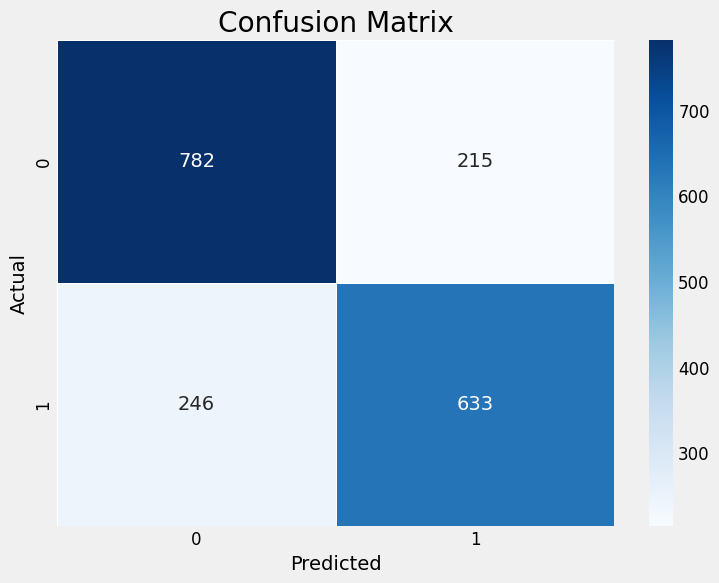

In [140]:

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [141]:

"""Importancia variaveis"""

'Importancia variaveis'

In [142]:

importances = modelo_xgboost.feature_importances_
variable_names = df_final.drop(['convertido'], axis=1).columns[selector.get_support()]


df_importances = pd.DataFrame({'Variable': variable_names, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)


In [143]:

"""Importancia variaveis"""
print("Variable Importances:")
print(df_importances)

Variable Importances:
                  Variable  Importance
8          nao_convertidos    0.123850
0              dias_desejo    0.108078
1                 vl_frete    0.099738
7              convertidos    0.096212
4            loucas_metais    0.094502
2             revestimento    0.089213
6            vlr_orcamento    0.083183
5              arg_rejunte    0.080057
10    ds_tipo_obra_Reforma    0.079685
3                 officina    0.077688
9   ds_tipo_obra_Nova Obra    0.067793


In [144]:

"""Grafico barras importancia variaveis"""

'Grafico barras importancia variaveis'

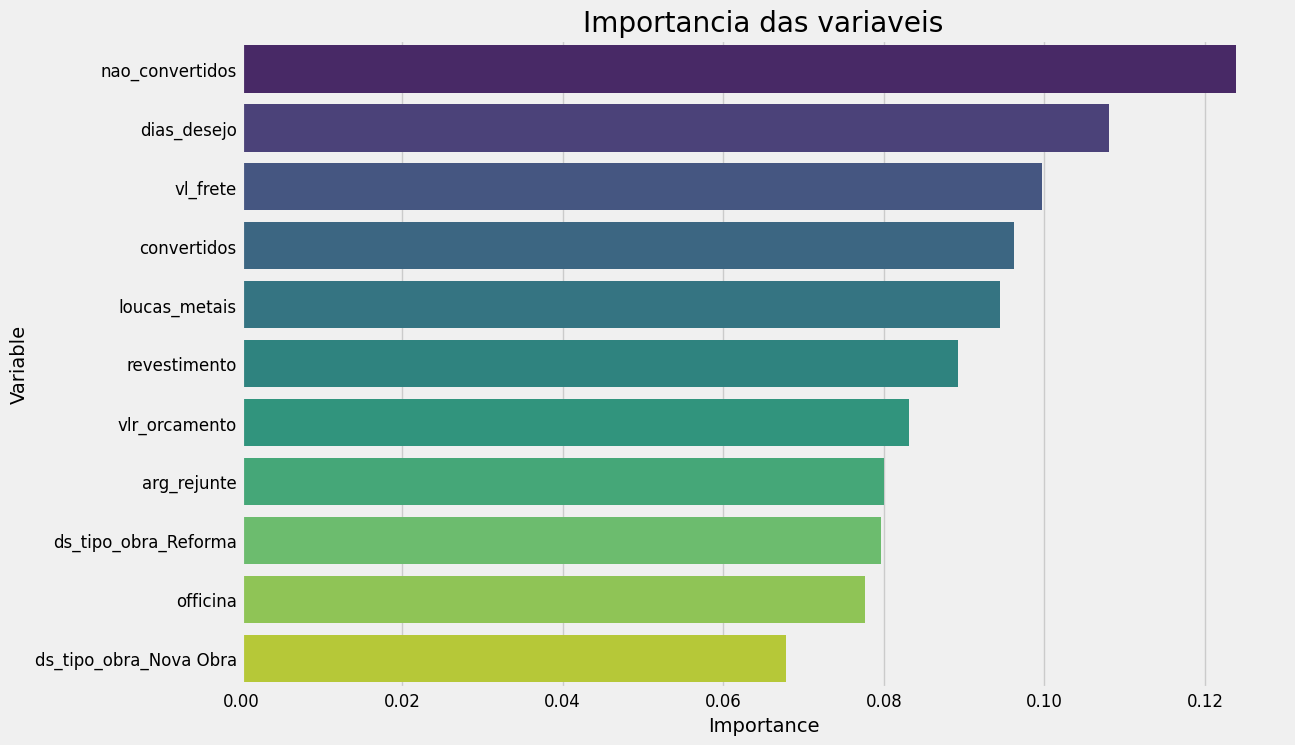

In [145]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Variable', data=df_importances, palette='viridis')
plt.title('Importancia das variaveis')
plt.show()


In [146]:

"""Relatorio classificação"""

'Relatorio classificação'

In [147]:

print("\nClassification Report:")
print(classification_report(y_teste, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       997
           1       0.75      0.72      0.73       879

    accuracy                           0.75      1876
   macro avg       0.75      0.75      0.75      1876
weighted avg       0.75      0.75      0.75      1876



In [148]:
"""Accuracy"""

'Accuracy'

In [149]:

acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')

Acurácia no conjunto de teste: 75.43%


In [150]:
probabilidades_teste = modelo_xgboost.predict_proba(x_teste)[:, 1]


x_teste_df = pd.DataFrame(x_teste, columns=variable_names)
df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': dados.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': y_teste,
    'probabilidade_conversao': probabilidades_teste
})

df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido'])


df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean'
})


"""Exibindo Resultados"""
with pd.option_context('display.max_rows', None):
    display(df_resultados_teste)



,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,1,0.431180
1,fabiano martins werutsky,0,0.251435
2,juliana westphalen gonçalves,1,0.325460


In [151]:
"""Matrix de Correlação"""

'Matrix de Correlação'

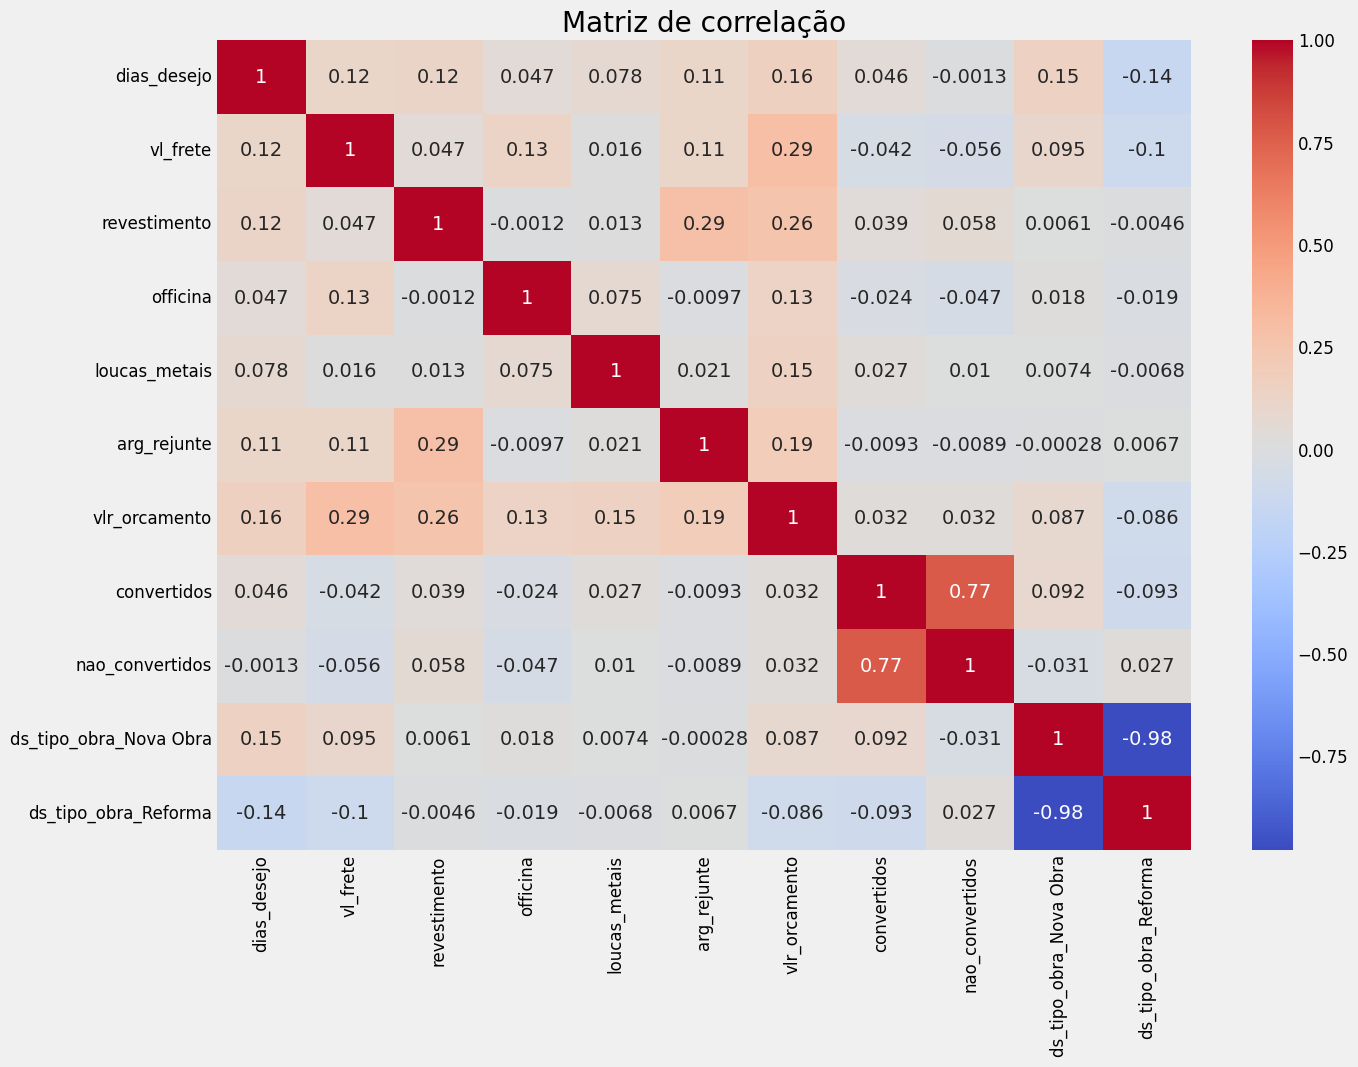

In [152]:


correlation_matrix = df_final[variable_names].corr()


"""Heatmap | Matrix Correlação"""
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()